Use thinning algorithm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm

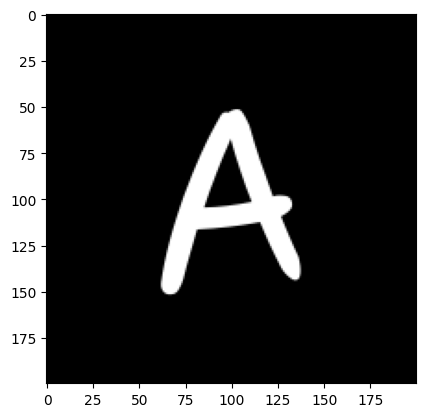

In [1]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


def create_image(size, bgColor, message, font, fontColor):
    W, H = size
    image = Image.new('RGB', size, bgColor)
    draw = ImageDraw.Draw(image)
    _, _, w, h = draw.textbbox((0, 0), message, font=font)
    draw.text(((W-w)/2, 0), message, font=font, fill=fontColor)
    return image

image_size = 200
font_size = int(image_size * 0.9)

myFont = ImageFont.truetype('./fonts/NanumPenScript-Regular.ttf', font_size)
myMessage = 'A'
myImage = create_image((image_size, image_size), 'black', myMessage, myFont, 'white')
# myImage.save('hello_world.png', "PNG")

plt.imshow(myImage)

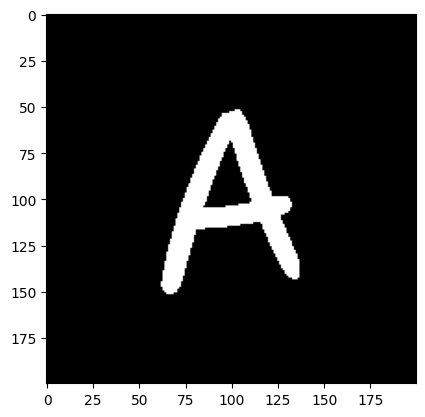

In [2]:
# thresholding

from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np


def create_image(size, bgColor, message, font, fontColor):
    W, H = size
    image = Image.new('RGB', size, bgColor)
    draw = ImageDraw.Draw(image)
    _, _, w, h = draw.textbbox((0, 0), message, font=font)
    draw.text(((W-w)/2, 0), message, font=font, fill=fontColor)
    return image

image_size = 200
font_size = int(image_size * 0.9)

myFont = ImageFont.truetype('./fonts/NanumPenScript-Regular.ttf', font_size)
myMessage = 'A'
myImage = create_image((image_size, image_size), 'black', myMessage, myFont, 'white')
reference = np.array(myImage.convert("L"))
threshold = 180
binary = reference > threshold
thresholded = Image.fromarray(binary)


plt.imshow(thresholded)

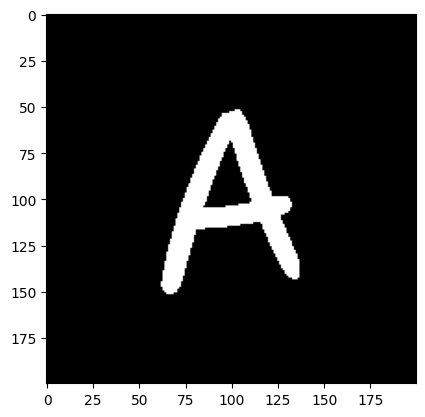

In [3]:
#skelotonizing

matrix1 = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]])
matrix2 = np.array([[0, 0, 0], [1, 1, 0], [0, 1, 0]])

for i in range(binary.shape[0] - 2):
    for j in range(binary.shape[1] - 2):
        if np.all(binary[i:i+3, j:j+3] == matrix1) or np.all(binary[i:i+3, j:j+3] == matrix2):
            binary[i+1, j+1] = 0

skeletoned = Image.fromarray(binary)
plt.imshow(skeletoned)

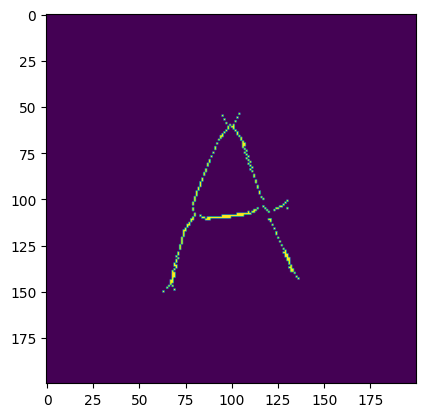

In [6]:
import cv2
import numpy as np

# Convert the Pillow image to a NumPy array
numpy_image = np.array(myImage)

# Now, you can use the NumPy array with OpenCV (cv2)
cv2_image = cv2.cvtColor(numpy_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding if not already binary
_, img = cv2.threshold(cv2_image, 128, 255, cv2.THRESH_BINARY)


# img = cv2.imread('sofsk.png',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

skeletonized = Image.fromarray(skel * 255)
plt.imshow(skeletonized)
# print(skel)

# cv2.imshow("skel",skel)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)


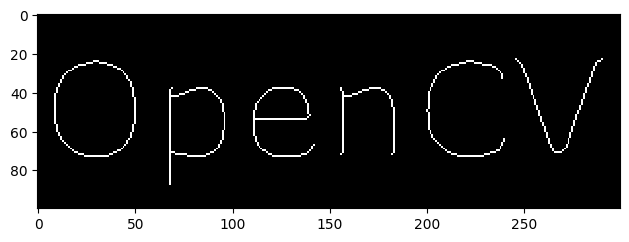

In [9]:
from skimage import io, color, morphology
import numpy as np

# Load your binary image (make sure it's binary)
binary_image = io.imread('sofsk.png', as_gray=True)

# Apply binary thresholding if not already binary
binary_image = (binary_image > 0.5).astype(bool)

# Perform skeletonization using the Zhang-Suen thinning algorithm
skeleton = morphology.skeletonize(binary_image)

# Save the connected skeletonized image
io.imsave('connected_skeleton_image.png', skeleton.astype(np.uint8) * 255)

# Display the connected skeletonized image
io.imshow(skeleton)
io.show()

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


/var/folders/8g/j89lqz_x4b9bfbtnbhb92_d40000gn/T/ipykernel_1697/1026661728.py:15: UserWarning: connected_skeleton_image.png is a low contrast image
  io.imsave('connected_skeleton_image.png', skeleton.astype(np.uint8) * 255)
/Users/hunkim/Github/curves/.venv/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


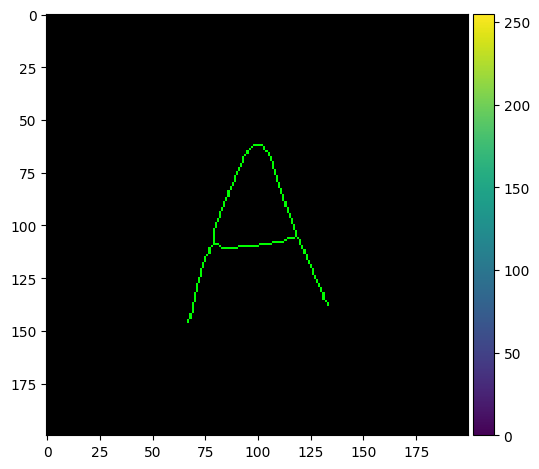

In [16]:
# Convert the Pillow image to a NumPy array
numpy_image = np.array(myImage)

# Load your binary image (make sure it's binary)
# binary_image = io.imread(numpy_image, as_gray=True)

# Apply binary thresholding if not already binary
# binary_image = (binary_image > 0.5).astype(bool)

# Perform skeletonization using the Zhang-Suen thinning algorithm
skeleton = morphology.skeletonize(numpy_image)

# Save the connected skeletonized image
io.imsave('connected_skeleton_image.png', skeleton.astype(np.uint8) * 255)

# Display the connected skeletonized image
image = Image.fromarray(skeleton)
io.imshow(skeleton)
io.show()